# Description for MHEALTH d

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

In [5]:
os.getcwd()
datadir= '..\data\MHEALTHDATASET'

In [6]:
os.listdir(datadir)

['mHealth_subject1.log',
 'mHealth_subject10.log',
 'mHealth_subject2.log',
 'mHealth_subject3.log',
 'mHealth_subject4.log',
 'mHealth_subject5.log',
 'mHealth_subject6.log',
 'mHealth_subject7.log',
 'mHealth_subject8.log',
 'mHealth_subject9.log',
 'README.txt']

In [16]:
outs = [] 
for each_file in os.listdir(datadir): 
    if each_file[-3:] == 'log': 
        tmp = pd.read_csv(os.path.join(datadir, each_file), 
                          sep = '\t', header = None)
        tmp['subjct'] = each_file[8:-4]
        outs.append(tmp)
outs = pd.concat(outs)
outs.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,subjct
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0,subject1


In [20]:
outs['subjct'].value_counts()

subject1     161280
subject9     135168
subject2     130561
subject8     129024
subject3     122112
subject5     119808
subject4     116736
subject7     104448
subject10     98304
subject6      98304
Name: subjct, dtype: int64

In [23]:
activity_map = { 0: 'Null',
    1: 'Standing still' ,
2: 'Sitting and relaxing',
3: 'Lying down', 
4: 'Walking' ,
5: 'Climbing stairs' ,
6: 'Waist bends forward' ,
7: 'Frontal elevation of arms' ,
8: 'Knees bending (crouching)',
9: 'Cycling',
10: 'Jogging' ,
11: 'Running' ,
12: 'Jump front & back'}

In [7]:
outs['activity_name'] = outs.iloc[:, 23].map(activity_map)
summary = outs.groupby(['subjct', 'activity_name']).size().reset_index()
summary
summary.pivot(index = 'activity_name', columns = 'subjct').reset_index().to_clipboard(sep = '\t')

In [10]:
sbjct1 = outs[outs['subjct'] == 'subject1']
sbjct1= pd.concat([sbjct1.iloc[:, :3], sbjct1['activity_name']], axis = 1)
sbjct1 = sbjct1[sbjct1['activity_name'] != 'Null']
sbjct1.columns = ['acc_chest_x', 'acc_chest_y', 'acc_chest_z', 'activity_name']

In [33]:
import matplotlib.style as mplstyle
mplstyle.use(['seaborn-poster', 'ggplot', 'fast'])

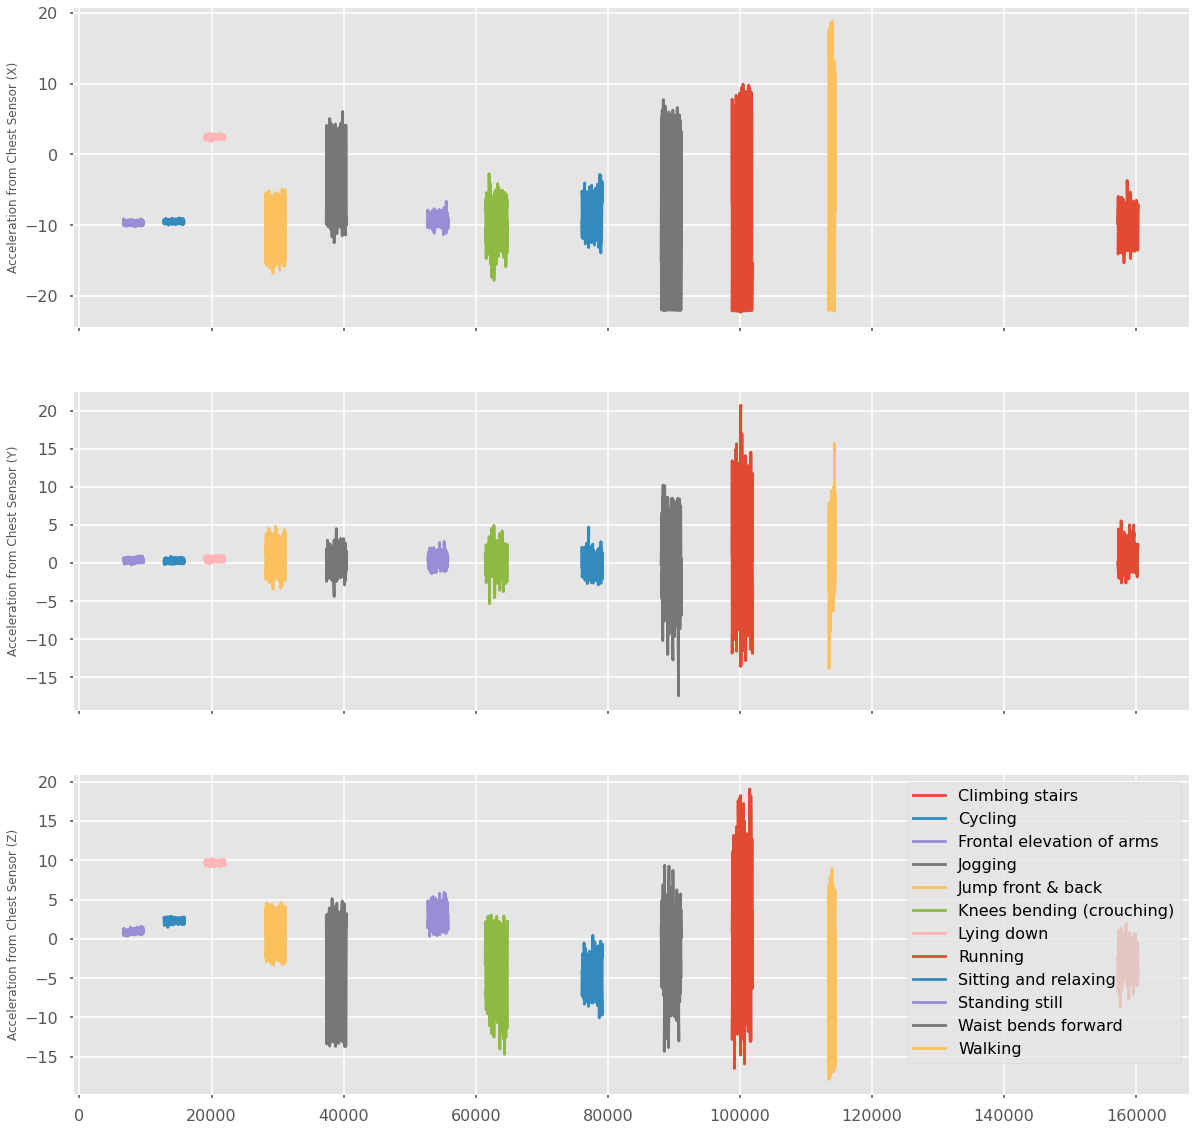

In [32]:
fig, axes = plt.subplots(3, 1, figsize = (20, 20), sharex= True)

for i, each_grp in sbjct1.groupby('activity_name'): 
    axes[0].plot(each_grp['acc_chest_x'], label= i)
    axes[0].set_ylabel('Acceleration from Chest Sensor (X)')
    # plt.legend()
for i, each_grp in sbjct1.groupby('activity_name'): 
    axes[1].plot(each_grp['acc_chest_y'], label= i)
    axes[1].set_ylabel('Acceleration from Chest Sensor (Y)')
for i, each_grp in sbjct1.groupby('activity_name'): 
    axes[2].plot(each_grp['acc_chest_z'], label= i)
    axes[2].set_ylabel('Acceleration from Chest Sensor (Z)')
    plt.legend()
plt.savefig('mhealth_summary.png')

<AxesSubplot:>